In [32]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import os
import datetime as dt


###  1) Joining all months sales togrther

### adding a month column using 'Order Date' column.

In [41]:
all_data = pd.DataFrame()

files = os.listdir('SalesAnalysis/Sales_Data')
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [44]:
for file in files:
    df = pd.read_csv('SalesAnalysis/Sales_Data/' + file)
    all_data = pd.concat([all_data, df])
    

# 2) Checking Null values in DataFrame

In [47]:
all_data.isna().sum()      

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

# 3) Dropping all rows containing any null values

In [48]:
all_data.dropna(how = 'any', inplace = True)

# 4) Reseting the index 

In [50]:
all_data.reset_index( drop = True, inplace = True)

# 5) Q.1) The month which has maximun Sales?

In [63]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [306]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14


In [65]:
all_data['month'] = all_data['Order Date'].str[0:2]

In [66]:
all_data['month'] = all_data['month'].astype('int32')

In [70]:
all_data['month'].dtype

dtype('int32')

In [75]:
all_data[['Quantity Ordered', 'Price Each']] = all_data[['Quantity Ordered', 'Price Each']].astype('float')

In [76]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [305]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14


In [78]:
all_month = all_data['month'].unique()

In [82]:
all_data[all_data['month'] == 2]['Sales'].sum()

2202022.42

In [84]:
month_wise = all_data.groupby('month').sum()

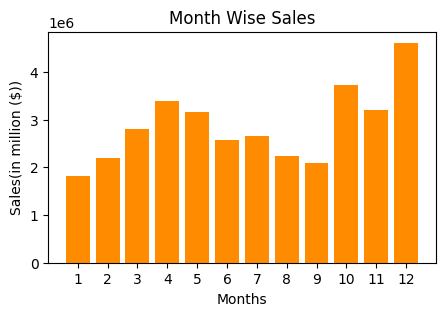

In [304]:
months = np.arange(1,13)
plt.figure(figsize = (5,3))
plt.bar(months, month_wise['Sales'], color = 'darkorange')
plt.xlabel('Months'), plt.ylabel('Sales(in million ($))')
plt.xticks(months) 
plt.title('Month Wise Sales')
plt.show()

In [135]:
# all_data['City'] = all_data['Purchase Address'].str.split(',')

In [151]:
# Using Apply Method and Lambda Function


all_data['City'] = all_data['Purchase Address'].apply( lambda x : (x.split(',')[1] + ' ' +  x.split(',')[2].split(' ')[1]))

In [152]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
1,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
2,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
3,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles CA
186301,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco CA
186302,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco CA
186303,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco CA


# (Q-) City which has maximun  and minumum sales?

In [153]:
city_sales = all_data.groupby('City').sum()

In [154]:
city_sales

,Quantity Ordered,Price Each,month,Sales
City,,,,
Atlanta GA,16602.0,2779908.20,104794,2795498.58
Austin TX,11153.0,1809873.61,69829,1819581.75
Boston MA,22528.0,3637409.77,141112,3661642.01
Dallas TX,16730.0,2752627.82,104620,2767975.40
Los Angeles CA,33289.0,5421435.23,208325,5452570.80
New York City NY,27932.0,4635370.83,175741,4664317.43
Portland ME,2750.0,447189.25,17144,449758.27
Portland OR,11303.0,1860558.22,70621,1870732.34
San Francisco CA,50239.0,8211461.74,315520,8262203.91


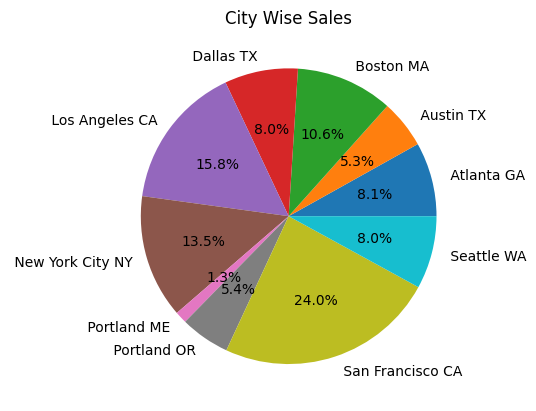

In [155]:
plt.pie(city_sales['Sales'], labels = city_sales.index,autopct = '%0.1f%%')
plt.title('City Wise Sales')
plt.show()

In [ ]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

# Adding a hour column from datetime module

In [172]:
# Here we can use dt.year,dt.month,dt.day,dt.hour,dt.minute,dt.second

all_data['Hour'] = all_data['Order Date'].dt.hour

In [285]:
all_data.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
1,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14


In [182]:
hours = all_data.groupby('Hour').sum()

In [184]:
hours[:5]

,Quantity Ordered,Price Each,month,Sales
Hour,,,,
0,4428.0,709296.70,27554,713721.27
1,2619.0,458490.00,16657,460866.88
2,1398.0,233833.64,8507,234851.44
3,928.0,144726.42,5904,145757.89
4,937.0,162058.18,6148,162661.01


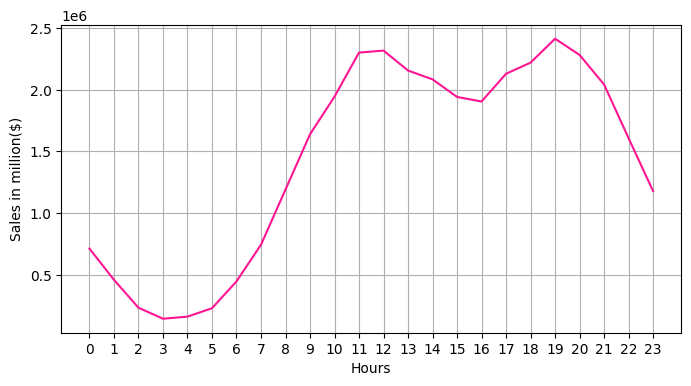

In [302]:
plt.figure(figsize=(8,4))
plt.plot(hours.index, hours['Sales'],color = 'deeppink'), plt.ylabel('Sales in million($)'), plt.xlabel('Hours'), plt.xticks(hours.index)
plt.grid()
plt.show()

# (Q-) What product are sold together?

In [190]:
df1 = all_data[all_data['Order ID'].duplicated(keep = False)]  # it will remove all duplicated 'Order ID'.


In [204]:
# Uses of transform function (transform is similar to apply method)

df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

C:\Users\mannu\AppData\Local\Temp\ipykernel_14664\2625597657.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Grouped'] = df1.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


In [205]:
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City,Hour,Grouped
2,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,"Google Phone,Wired Headphones"
17,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...
186248,259303,AA Batteries (4-pack),1.0,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta GA,20,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186259,259314,Wired Headphones,1.0,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta GA,0,"Wired Headphones,AAA Batteries (4-pack)"
186260,259314,AAA Batteries (4-pack),2.0,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta GA,0,"Wired Headphones,AAA Batteries (4-pack)"
186296,259350,Google Phone,1.0,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco CA,13,"Google Phone,USB-C Charging Cable"


In [287]:
from itertools import combinations
from collections import Counter

In [288]:
count = Counter()

for row in df1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
count.most_common(10)

for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


# (Q-) What product Sold the most?

In [269]:
products = all_data.groupby('Product').sum()

In [291]:
products

,Quantity Ordered,Price Each,month,Sales,Hour
Product,,,,,
20in Monitor,4129.0,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,6244.0,2429637.70,44440,2435097.56,90916
27in FHD Monitor,7550.0,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,6199.0,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),27635.0,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),31017.0,61716.59,146370,92740.83,297332
Apple Airpods Headphones,15661.0,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457.0,1332366.75,94113,1345565.43,192445
Flatscreen TV,4819.0,1440000.00,34224,1445700.00,68815


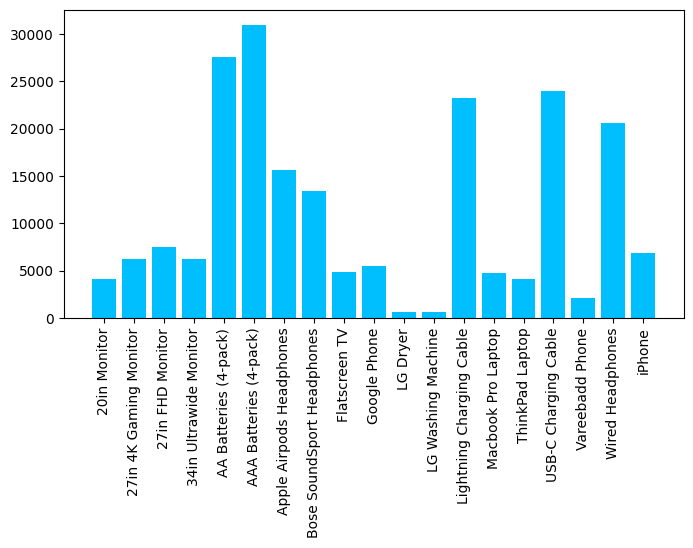

In [298]:
plt.figure(figsize = (8,4))

plt.bar(products.index, products['Quantity Ordered'], color = 'deepskyblue')
plt.xticks(products.index, rotation = 90)
plt.show()

In [271]:
prices = all_data.groupby('Product').mean()['Price Each']

In [272]:
# prices.sum()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\mannu\AppData\Local\Temp\ipykernel_14664\1915928974.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products.index,rotation ='vertical',size =8)


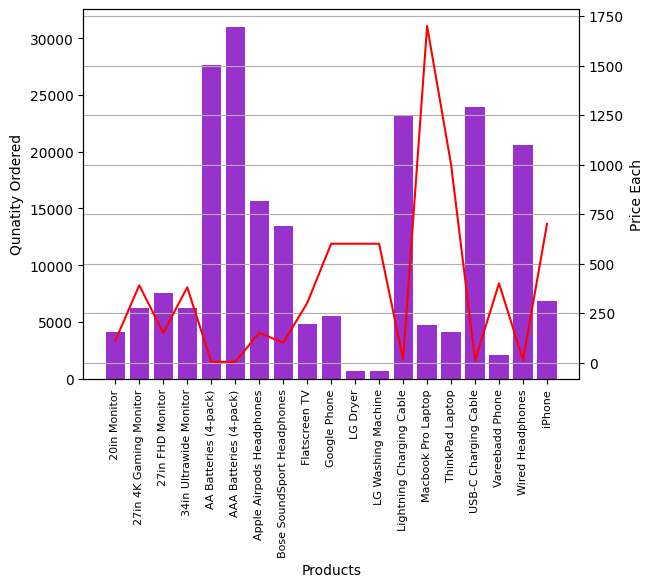

In [299]:
# plt.figure(figsize = (9,4))

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()


ax1.bar(products.index, products['Quantity Ordered'], color = 'darkorchid')
ax2.plot(products.index, prices, color = 'red')

plt.grid()
ax1.set_ylabel('Qunatity Ordered'), ax2.set_ylabel('Price Each'), ax1.set_xlabel('Products')
ax1.set_xticklabels(products.index,rotation ='vertical',size =8)
plt.show()
